# 따릉이

In [1]:
import pandas as pd #판다스 패키지

In [2]:
# 파일 읽기
train=pd.read_csv('train.csv') #모델 학습 파일
test=pd.read_csv('test.csv') #모델 시험지 파일
submission = pd.read_csv('submission.csv')#답안지 파일

# EDA

## 탐색적 자료분석 (어떤 데이터)

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


* preciptation : 비 정보. 비 안오면 0 비오면 1
* visibility : 시정, 시계
* count : 따릉이 대여수

- count 를 예측. (train을 바탕으로 test)


### 데이터 크기

In [6]:
print(train.shape)
print(test.shape) #count 열 없음
print(submission.shape) #test 셋의 count 값을 submission(답안지)에 

(1459, 11)
(715, 10)
(715, 2)


### 결측값 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id hour (1459obs) 제외 결측치 존재

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


Id hour (715 obs) 

In [9]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [10]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


##### 시간별로 따릉이 대여량 평균

In [11]:
train.groupby('hour').mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [12]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [13]:
#시간대별 데이터 개수
train.groupby('hour').count()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,60,59,59,58,59,59,59,59,58,60
1,61,61,61,60,61,61,0,0,0,61
2,61,61,61,60,61,61,61,61,60,61
3,61,61,61,60,61,61,61,61,60,61
4,61,61,61,61,61,61,61,61,60,61
5,61,61,61,61,61,61,61,61,59,61
6,61,61,61,61,61,61,60,60,58,61
7,61,61,61,61,61,61,60,60,59,61
8,61,61,61,61,61,61,61,61,59,61


### 시각화

In [14]:
# 시각화
import matplotlib.pyplot as plt

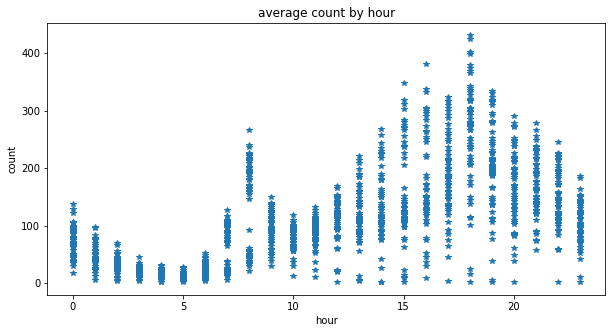

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train['hour'],train['count'],'*',data=train)

plt.title('average count by hour')
plt.xlabel('hour')
plt.ylabel('count')

plt.show()

출근/등교시간이나 퇴근/하교시간에 많음

Text(18, 260, 'go home')

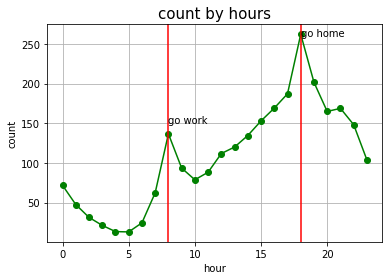

In [16]:
plt.plot(train.groupby('hour').mean()['count'],marker='o',color='g')
plt.grid()

#제목 축
plt.title('count by hours',fontsize=15)
plt.xlabel('hour')
plt.ylabel('count')

#위에 원하는 선

plt.axvline(8,color='red') #vertical line
plt.axvline(18,color='red')

#원하는 텍스트
plt.text(8,150,'go work')
plt.text(18,260,'go home')

#plt.savefig('picture.png')

시간이 증가할수록 대여량 증가

~

변수간에 상관관계 표현 (상관계수)
* -1 ~ 1

In [17]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [18]:
#heatmap
import seaborn as sns
import numpy as np

<ipython-input-19-092f223aa479>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)


<AxesSubplot:>

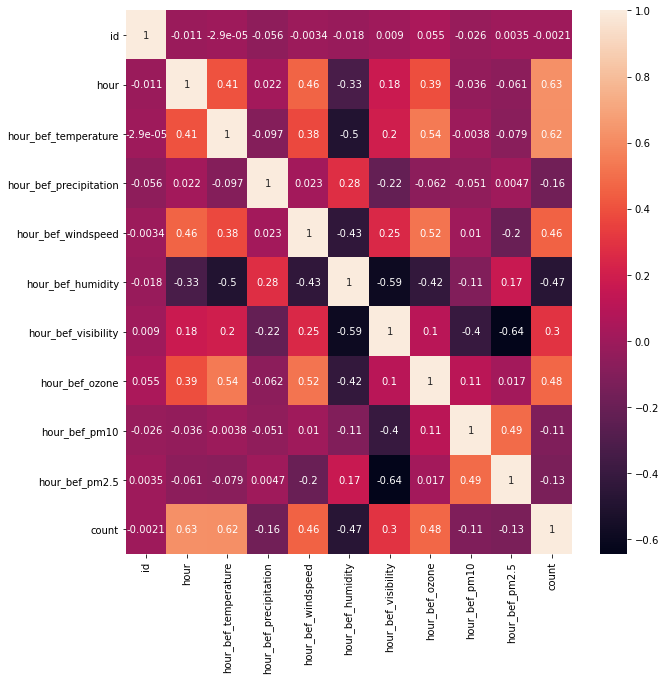

In [19]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train.corr(),annot=True)

count 상관계수 높은 hour, temp, windspeed 사용 + humidity & ozone


* 추가 몇몇 그래프


### 이상치 확인

<AxesSubplot:ylabel='count'>

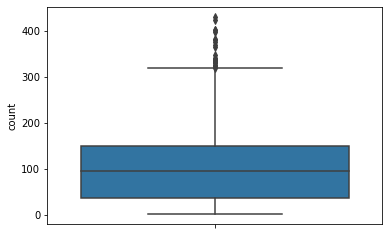

In [20]:
sns.boxplot(y='count',data=train)

<AxesSubplot:ylabel='hour_bef_windspeed'>

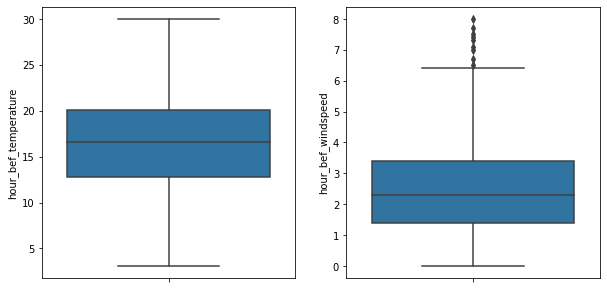

In [21]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_temperature',data=train,ax=ax1)
sns.boxplot(y='hour_bef_windspeed',data=train,ax=ax2)

<AxesSubplot:ylabel='hour_bef_ozone'>

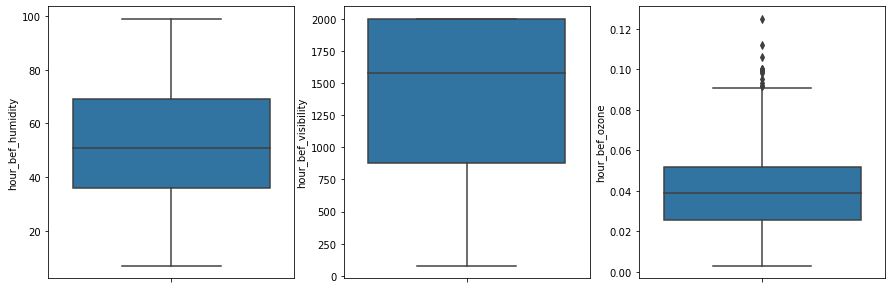

In [22]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(y='hour_bef_humidity',data=train,ax=ax1)
sns.boxplot(y='hour_bef_visibility',data=train,ax=ax2)
sns.boxplot(y='hour_bef_ozone',data=train,ax=ax3)

<AxesSubplot:ylabel='hour_bef_pm2.5'>

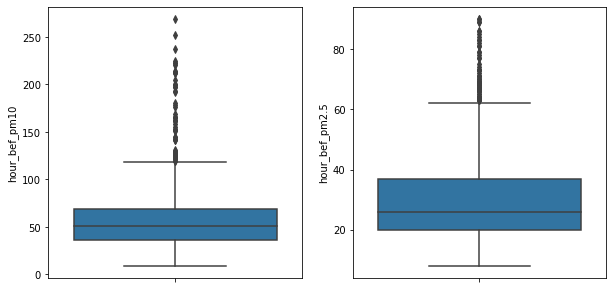

In [23]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_pm10',data=train,ax=ax1)
sns.boxplot(y='hour_bef_pm2.5',data=train,ax=ax2)

In [24]:
train[train['hour_bef_pm10']>200]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
49,83,6,11.0,0.0,1.3,25.0,1056.0,0.041,213.0,21.0,12.0
120,179,3,13.2,0.0,2.5,25.0,950.0,0.041,269.0,21.0,16.0
233,365,14,23.1,0.0,3.6,44.0,620.0,0.080,237.0,62.0,91.0
343,527,9,13.4,0.0,2.6,21.0,986.0,0.027,212.0,20.0,59.0
446,690,12,21.4,0.0,3.0,46.0,565.0,0.064,213.0,57.0,104.0
617,947,4,12.3,0.0,2.8,22.0,1082.0,0.042,223.0,20.0,16.0
653,1000,5,11.8,0.0,2.5,21.0,1014.0,0.042,205.0,18.0,6.0
680,1038,16,22.8,0.0,4.3,40.0,716.0,0.075,212.0,NaN,135.0
1061,1597,13,23.2,0.0,3.7,45.0,527.0,0.069,225.0,61.0,91.0
1263,1911,2,14.2,0.0,4.9,33.0,660.0,0.041,252.0,31.0,26.0


In [25]:
#outlier
"""
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx
"""

def out(df=None,col=None):
  q1=df[col].quantile(q=0.25)
  q3=df[col].quantile(q=0.75)
  iqr=q3-q1

  low=-3*iqr+q1
  high=q3+3*iqr

  lowout = df[(df[col] < low)]
  highout = df[(df[col] > high)]
  print(lowout)
  print(highout)

In [26]:
out(train,'hour_bef_ozone')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []


In [27]:
out(train,'hour_bef_pm10')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  hour_bef_precipitation  \
20      35    10                  15.4                     0.0   
49      83     6                  11.0                     0.0   
62      97    21                  18.6                     0.0   
120    179     3                  13.2                     0.0   
183    280    11                  19.6                     0.0   
233    365    14                  23.1                     0.0   
234    366    17                  22.3                     0.0   
280    437    20                  19.3                     0.0   
343    527     9                  13.4                     0.0   
446    690    12                  21.4                     0.0   
617    947     4                  12.3                     0.0   
65

In [28]:
out(train,'hour_bef_pm2.5')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  hour_bef_precipitation  \
428    666    12                  13.8                     0.0   
511    787     4                  12.3                     0.0   
1155  1743     8                  15.3                     0.0   
1191  1796    13                  15.7                     0.0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
428                  2.8               42.0                516.0   
511                  1.5               36.0                966.0   
1155                 1.5               68.0                272.0   
1191                 3.3               37.0                526.0   

      hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
428            0.031          104.0            89.0   82.0  


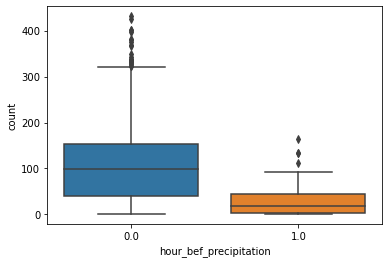

In [29]:

sns.boxplot(x='hour_bef_precipitation', y='count', data=train)
plt.show()

In [30]:
#비 여부에 따른 평균대여량
train.groupby('hour_bef_precipitation').mean()['count']

hour_bef_precipitation
0.0    111.130404
1.0     33.673913
Name: count, dtype: float64

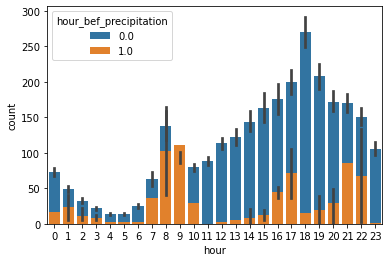

In [31]:
sns.barplot(x='hour', y='count', hue='hour_bef_precipitation', dodge=False, data=train) #dodge 누적
plt.show()

# 전처리

In [32]:
train1=train

In [33]:
train1.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### 결측치 처리

fillna() 함수로 결측치 대체

#### train dataset


In [34]:
tna = train1[train1['hour_bef_temperature'].isna()].index
tna


Int64Index([934, 1035], dtype='int64')

In [35]:
train2 = train1.drop(tna) #결측지 제거 된 df = train2

In [36]:
train2[train2['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [37]:
#더미변수 생성
#tdum = pd.get_dummies(train2['hour'])
#train2 = train2.join(tdum.add_prefix('hour_'))
#train2

In [40]:
train2.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [41]:
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010807,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.001212
hour,-0.010807,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.627227
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [42]:
#풍속의 결측치 위치
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [43]:
#1시 median 으로
train2[train['hour']==1]['hour_bef_windspeed'].median()

<ipython-input-43-a9bb1d10ef44>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train2[train['hour']==1]['hour_bef_windspeed'].median()


1.65

In [44]:
train2.loc[244,'hour_bef_windspeed']=1.65
train2.loc[244,]

id                         381.00
hour                         1.00
hour_bef_temperature        14.10
hour_bef_precipitation       0.00
hour_bef_windspeed           1.65
hour_bef_humidity           55.00
hour_bef_visibility       1992.00
hour_bef_ozone                NaN
hour_bef_pm10                 NaN
hour_bef_pm2.5                NaN
count                       38.00
Name: 244, dtype: float64

In [45]:
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


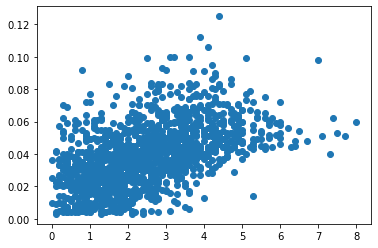

In [46]:
#ozone 을 통해 windspeed 결측치
plt.scatter(x='hour_bef_windspeed',y='hour_bef_ozone',data=train2)

In [47]:
train2.groupby('hour_bef_ozone')['hour_bef_windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
hour_bef_ozone,,,,,,,,
0.003,4.0,1.475000,1.027538,0.1,1.000,1.7,2.175,2.4
0.004,20.0,1.145000,0.747258,0.1,0.475,1.0,1.725,2.8
0.005,17.0,1.335294,0.831370,0.2,0.800,1.0,1.800,3.1
0.006,16.0,1.162500,0.814760,0.3,0.600,0.9,1.700,3.6
0.007,11.0,1.400000,0.869483,0.4,0.900,1.3,1.650,3.5
...,...,...,...,...,...,...,...,...
0.099,2.0,3.800000,1.838478,2.5,3.150,3.8,4.450,5.1
0.100,3.0,3.300000,0.264575,3.1,3.150,3.2,3.400,3.6
0.106,1.0,4.100000,NaN,4.1,4.100,4.1,4.100,4.1


In [48]:
train2[train2['hour_bef_ozone']==0.046]['hour_bef_windspeed'].describe()

count    17.000000
mean      3.358824
std       1.212466
min       1.400000
25%       2.800000
50%       3.200000
75%       4.200000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [49]:
train2[train2['hour_bef_ozone']==0.049]['hour_bef_windspeed'].describe()

count    28.000000
mean      2.642857
std       1.499735
min       0.500000
25%       1.375000
50%       2.500000
75%       3.400000
max       5.500000
Name: hour_bef_windspeed, dtype: float64

In [50]:
train2[train2['hour_bef_ozone']==0.058]['hour_bef_windspeed'].describe()

count    14.000000
mean      3.871429
std       1.478267
min       0.600000
25%       3.175000
50%       3.900000
75%       4.800000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [51]:
tt=train2[0.057<train2['hour_bef_ozone']]
tt=tt[tt['hour_bef_ozone']<0.059]
tt['hour_bef_windspeed'].describe()

count    14.000000
mean      3.871429
std       1.478267
min       0.600000
25%       3.175000
50%       3.900000
75%       4.800000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [52]:
tt=train2[0.044<=train2['hour_bef_ozone']]
tt=tt[tt['hour_bef_ozone']<0.045]
tt['hour_bef_windspeed'].describe()

count    29.000000
mean      3.682759
std       1.194950
min       1.000000
25%       3.100000
50%       3.500000
75%       4.500000
max       6.300000
Name: hour_bef_windspeed, dtype: float64

In [53]:
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [54]:
#1시가 아닌 windspeed 결측치 - ozone 별로 나누어 median으로 대체
train2['hour_bef_windspeed'].fillna({18:3.2,260:2.5,376:3.5, 780:3.9 ,1138:3.5,1229:3.5}, inplace=True)

In [55]:
train2.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [56]:
#ozone 결측치 확인
train2[train2['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [57]:
train2.groupby('hour')['hour_bef_ozone'].describe()
#1시 일때 모두 NAN

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,59.0,0.033763,0.016296,0.003,0.02250,0.0350,0.04250,0.074
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,0.030492,0.016567,0.003,0.01800,0.0310,0.03900,0.083
3,61.0,0.031213,0.017270,0.003,0.01800,0.0340,0.04100,0.082
4,61.0,0.031984,0.016320,0.004,0.02000,0.0330,0.04100,0.081
5,61.0,0.031623,0.015445,0.004,0.02200,0.0320,0.04000,0.077
6,60.0,0.029317,0.014817,0.004,0.02000,0.0295,0.03900,0.069
7,60.0,0.025300,0.014314,0.003,0.01475,0.0250,0.03325,0.062
8,61.0,0.021197,0.012415,0.004,0.01200,0.0210,0.02800,0.061


In [58]:
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010807,-0.000029,-0.056267,-0.002720,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.001212
hour,-0.010807,1.000000,0.407306,0.021646,0.460725,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.627227
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375323,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022322,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.002720,0.460725,0.375323,0.022322,1.000000,-0.433562,0.252381,0.520934,0.009185,-0.199637,0.459057
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433562,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252381,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520934,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.009185,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199637,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:xlabel='hour_bef_temperature'>

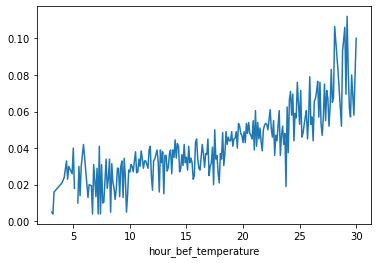

In [59]:
train2.groupby('hour_bef_temperature')['hour_bef_ozone'].median().plot()
#온도별 평균 ozone

In [60]:
train2.groupby('hour_bef_temperature')['hour_bef_temperature','hour_bef_ozone'].median() #온도에 따른 ozone

<ipython-input-60-68f2d1c2369c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train2.groupby('hour_bef_temperature')['hour_bef_temperature','hour_bef_ozone'].median() #온도에 따른 ozone


,hour_bef_temperature,hour_bef_ozone
hour_bef_temperature,,
3.1,3.1,0.005
3.2,3.2,0.004
3.3,3.3,0.016
4.0,4.0,0.021
4.2,4.2,0.024
...,...,...
29.4,29.4,0.062
29.5,29.5,0.057
29.6,29.6,0.080


In [61]:
train['hour_bef_temperature'].describe()

count    1457.000000
mean       16.717433
std         5.239150
min         3.100000
25%        12.800000
50%        16.600000
75%        20.100000
max        30.000000
Name: hour_bef_temperature, dtype: float64

In [62]:
#구간별 온도와 평균 오존농도
tempoz={}
for x in range(3, 31, 1): #구간은 1도 씩 끊음.
    start = x
    end = x+1
    temp = train2[(train2["hour_bef_temperature"] >= start) & (train2["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].mean()
#print(tempoz)


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in train2[train2['hour_bef_ozone'].isna()].index:
  a=train2.loc[i,'hour_bef_temperature']
  aa=a//1 
  #print(aa,tempoz[aa])
  train2['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)
  

In [63]:
train2[train2['hour_bef_ozone'].isna()] #결측치 제거

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [64]:
#미세먼지 - visibility로 pm 결측치 대체
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010807,-0.000029,-0.056267,-0.002720,-0.017948,0.008950,0.051551,-0.025510,0.003545,-0.001212
hour,-0.010807,1.000000,0.407306,0.021646,0.460725,-0.329612,0.176491,0.387679,-0.035907,-0.061229,0.627227
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375323,-0.496088,0.197417,0.546467,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022322,0.276481,-0.217155,-0.063328,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.002720,0.460725,0.375323,0.022322,1.000000,-0.433562,0.252381,0.517731,0.009185,-0.199637,0.459057
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433562,1.000000,-0.592244,-0.418717,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252381,-0.592244,1.000000,0.099276,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.051551,0.387679,0.546467,-0.063328,0.517731,-0.418717,0.099276,1.000000,0.111694,0.015517,0.479541
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.009185,-0.108106,-0.403277,0.111694,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199637,0.167736,-0.644989,0.015517,0.489558,1.000000,-0.134293


<AxesSubplot:xlabel='hour_bef_visibility', ylabel='hour_bef_pm2.5'>

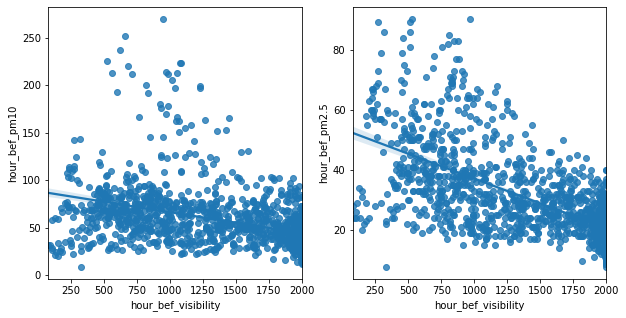

In [65]:
#pm - visibility
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='hour_bef_visibility', y='hour_bef_pm10', data=train2, fit_reg=True,ax=ax1)
sns.regplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train2, fit_reg=True,ax=ax2)

In [66]:
print(train2['hour_bef_visibility'].describe())
print()
print(train2['hour_bef_pm10'].describe())
print()
print(train2['hour_bef_pm2.5'].describe())

#outlier 있음 - mean 보다는 median 으로 대체

count    1457.000000
mean     1405.216884
std       583.131708
min        78.000000
25%       879.000000
50%      1577.000000
75%      1994.000000
max      2000.000000
Name: hour_bef_visibility, dtype: float64

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64


<AxesSubplot:ylabel='hour_bef_visibility'>

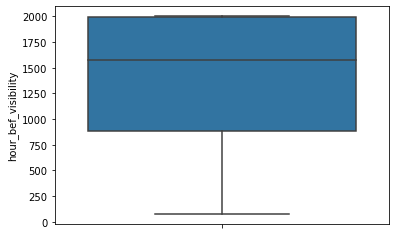

In [67]:
sns.boxplot(y='hour_bef_visibility',data=train2)

In [68]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100): #100씩 나눈다
    start = x
    end = x+100

    #0이상 100미만

    tempp = train2[(train2["hour_bef_visibility"] >= start) & (train2["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in train2[train2['hour_bef_pm10'].isna()].index:
  b = train2.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train2['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in train2[train2['hour_bef_pm2.5'].isna()].index:
  b = train2.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train2['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [69]:
train2[train2['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [70]:
train2.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<ipython-input-71-092f223aa479>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)


<AxesSubplot:>

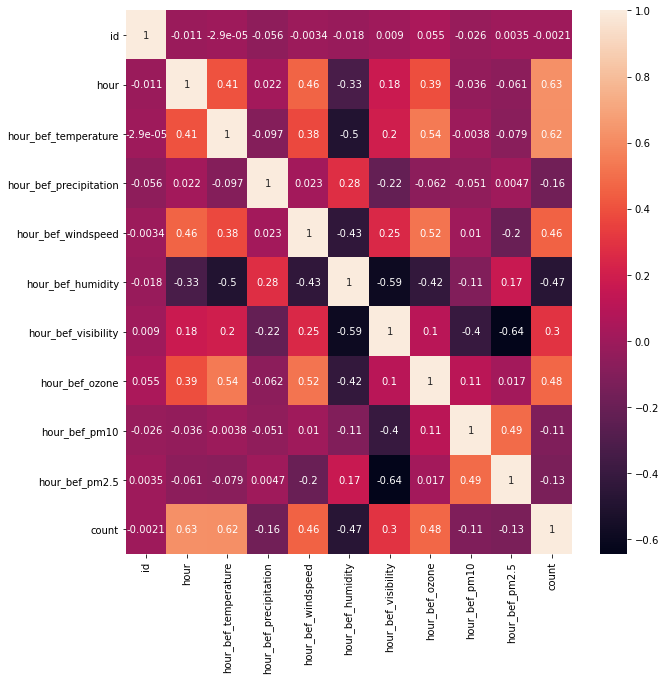

In [71]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train.corr(),annot=True)

<ipython-input-72-a914fbf7cc2b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train2.corr(), dtype=np.bool)


<AxesSubplot:>

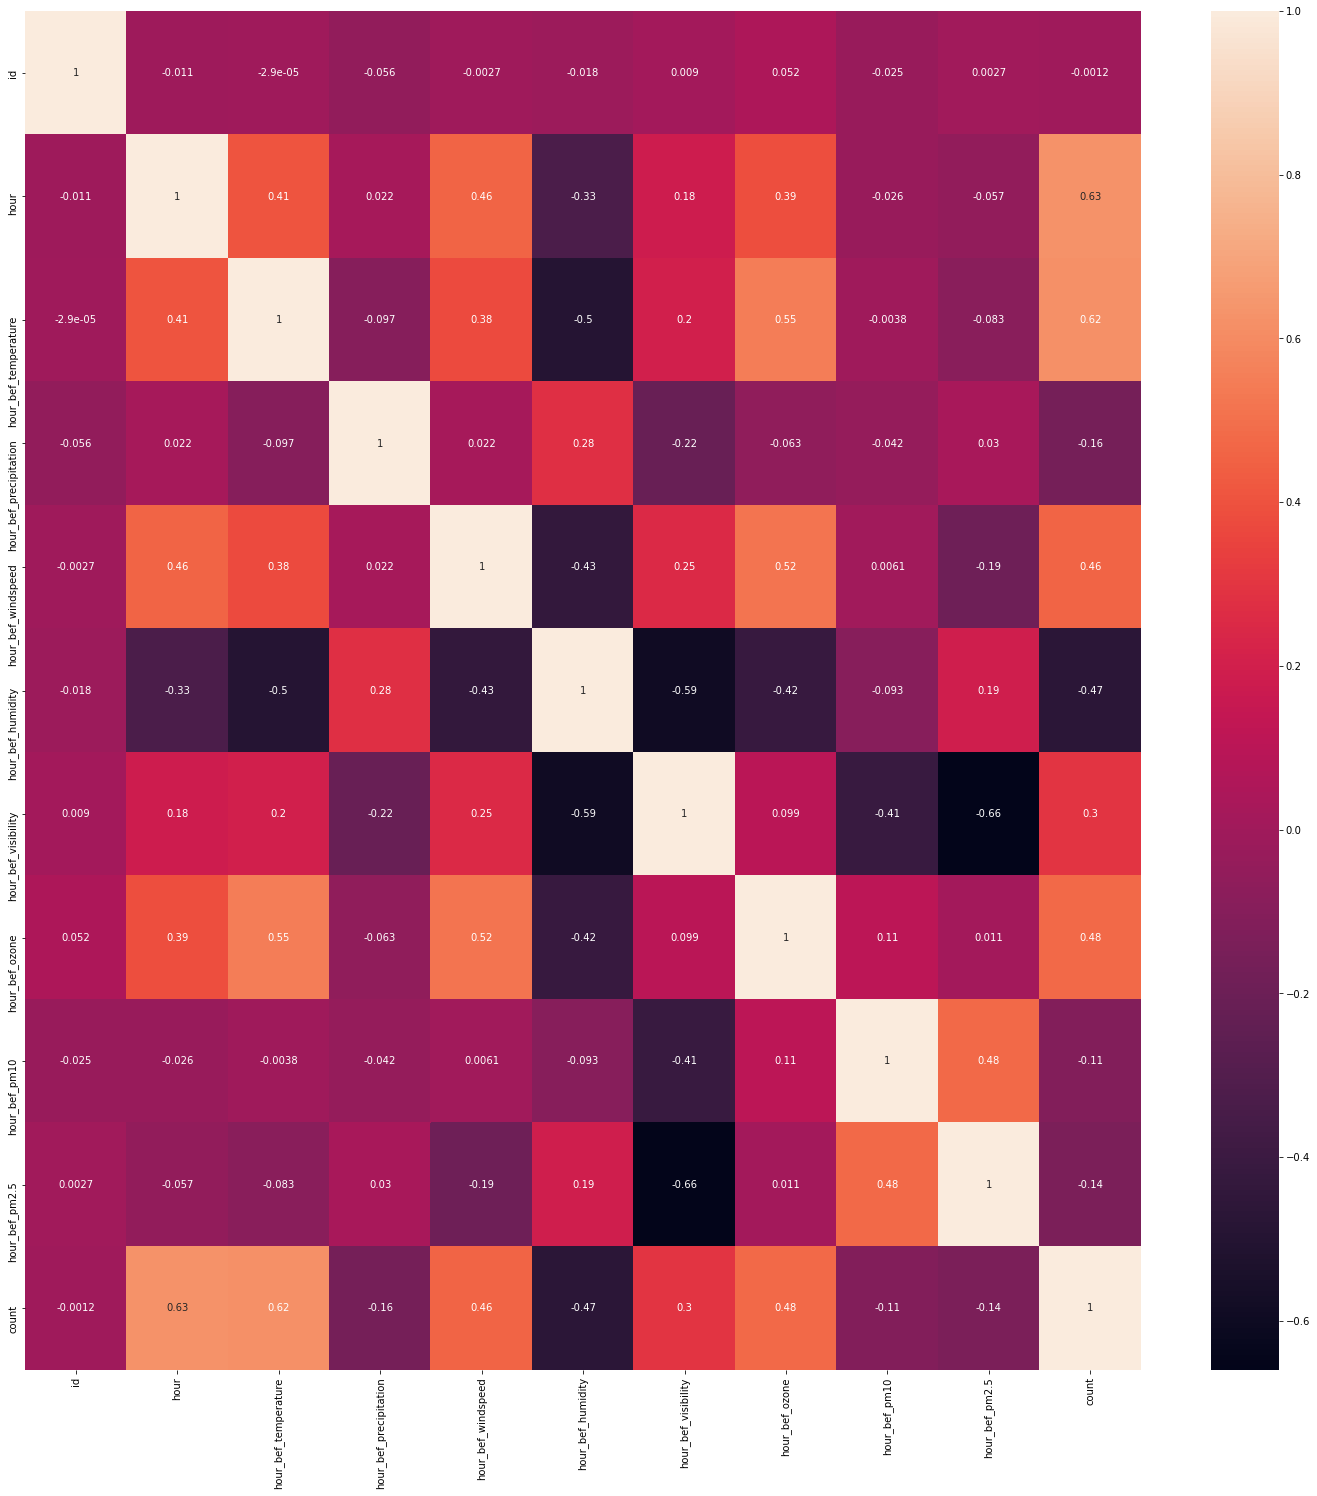

In [72]:
plt.figure(figsize=(25,25))

mask = np.zeros_like(train2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train2.corr(),annot=True)

#### test dataset

In [73]:
test.isna().sum() 
#test의 결측치도 대체하기

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [74]:
#온도
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
test1=test

In [76]:
#더미변수 생성
#tedum = pd.get_dummies(test1['hour'])
#test1 = test1.join(tedum.add_prefix('hour_'))
#test1

In [77]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [78]:
test1[test1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
train2.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1105.391901,11.496911,16.717433,0.031572,2.482052,52.231297,1405.216884,0.039003,56.952642,30.428277,108.684969
std,631.609634,6.918890,5.239150,0.174917,1.376531,20.370387,583.131708,0.019117,31.012822,14.482351,82.620202
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.000000,6.000000,12.800000,0.000000,1.400000,36.000000,879.000000,0.026000,36.000000,20.000000,37.000000
50%,1113.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.038000,51.000000,27.000000,96.000000
75%,1652.000000,17.000000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.051000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [81]:
train2[train2['hour']==19].describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,61.000000,61.0,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1153.147541,19.0,19.704918,0.032787,3.595082,43.57377,1576.688525,0.053967,53.770492,28.327869,201.606557
std,632.276254,0.0,4.605664,0.179556,1.153173,19.66084,523.652542,0.015620,26.547061,13.008614,75.977689
min,55.000000,19.0,10.600000,0.000000,0.700000,8.00000,250.000000,0.022000,17.000000,10.000000,1.000000
25%,601.000000,19.0,16.600000,0.000000,3.000000,29.00000,1222.000000,0.043000,36.000000,19.000000,150.000000
50%,1088.000000,19.0,19.400000,0.000000,3.700000,40.00000,1942.000000,0.053000,49.000000,25.000000,204.000000
75%,1699.000000,19.0,23.500000,0.000000,4.300000,53.00000,2000.000000,0.062000,67.000000,37.000000,244.000000
max,2168.000000,19.0,28.700000,1.000000,7.000000,92.00000,2000.000000,0.100000,180.000000,62.000000,335.000000


In [82]:
#전부 결측치인 경우 19시 median 값들로 대체
train2[train2['hour']==19]['hour_bef_ozone'].median()

0.053

In [83]:
for a in ['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']:
  #print(test1.loc[653,a])
  #print( train2[train2['hour']==19][a].median() )
  test1.loc[653,a]=train2[train2['hour']==19][a].median()

test1.loc[653]

id                        1943.000
hour                        19.000
hour_bef_temperature        19.400
hour_bef_precipitation       0.000
hour_bef_windspeed           3.700
hour_bef_humidity           40.000
hour_bef_visibility       1942.000
hour_bef_ozone               0.053
hour_bef_pm10               49.000
hour_bef_pm2.5              25.000
Name: 653, dtype: float64

In [84]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            34
hour_bef_pm10             36
hour_bef_pm2.5            35
dtype: int64

In [85]:
#ozone
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN
47,147,1,22.8,0.0,1.2,57.0,1190.0,NaN,NaN,NaN
86,260,1,20.0,0.0,2.0,65.0,1662.0,NaN,NaN,NaN
92,270,1,20.0,0.0,1.7,31.0,2000.0,NaN,NaN,NaN
102,297,1,15.1,1.0,2.2,98.0,224.0,NaN,NaN,NaN
114,323,1,18.7,0.0,1.4,41.0,2000.0,NaN,NaN,NaN
126,352,1,19.2,0.0,1.4,80.0,1085.0,NaN,NaN,NaN
129,358,1,23.6,0.0,0.9,83.0,466.0,NaN,NaN,NaN
209,609,1,18.6,0.0,2.4,37.0,2000.0,NaN,NaN,NaN


In [86]:
#구간별 평균 온도와 평균오존농도

tempoz={}
for x in range(3, 31, 1):
    start = x
    end = x+1
    temp = train2[(train2["hour_bef_temperature"] >= start) & (train2["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].median()


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_ozone'].isna()].index:
  a=test1.loc[i,'hour_bef_temperature']
  aa=a//1 
  test1['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)

In [87]:
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [88]:
test1[test1['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
18,42,18,29.4,0.0,3.3,43.0,1685.0,0.055000,NaN,NaN
32,82,1,22.8,0.0,2.4,52.0,2000.0,0.050415,NaN,NaN
40,115,1,21.5,1.0,0.5,90.0,347.0,0.049000,NaN,NaN
47,147,1,22.8,0.0,1.2,57.0,1190.0,0.050415,NaN,NaN
86,260,1,20.0,0.0,2.0,65.0,1662.0,0.049000,NaN,NaN
92,270,1,20.0,0.0,1.7,31.0,2000.0,0.049000,NaN,NaN
102,297,1,15.1,1.0,2.2,98.0,224.0,0.034958,NaN,NaN
114,323,1,18.7,0.0,1.4,41.0,2000.0,0.040000,NaN,NaN
126,352,1,19.2,0.0,1.4,80.0,1085.0,0.045000,NaN,NaN
128,356,15,25.5,0.0,3.6,40.0,1404.0,0.077000,NaN,NaN


In [89]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100):
    start = x
    end = x+100

    #0이상 100미만

    tempp = train2[(train2["hour_bef_visibility"] >= start) & (train2["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_pm10'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in test1[test1['hour_bef_pm2.5'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [121]:
test1.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

Random forest

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [123]:
train2.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

random forest 의 옵션 (ctrl+shift)

n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

- n_estimators : 100개의 나무들로 학습. 200,300 바꿀 수도 있음
- n_jobs : cpu 개수. n_jobs=-1 하면 cpu 모두 
- max_depth : 나무의 깊이. overfitting 방지.

# 모델링

## train - train / test split

In [265]:
X=train2.drop(['id','count'],axis=1)
y=train2['count']


#train 을 train/test로 분리
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test= train_test_split(X,y, test_size=0.2)

"""
#데이터 정규화
from sklearn.preprocessing import StandardScaler
normalizer=StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
"""

'\n#데이터 정규화\nfrom sklearn.preprocessing import StandardScaler\nnormalizer=StandardScaler()\nX_train = normalizer.fit_transform(X_train)\nX_test = normalizer.transform(X_test)\n'

In [266]:
features=X.columns

In [267]:
print(X_train.shape)
print(X_test.shape)

(1165, 9)
(292, 9)


In [268]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [209]:
#rg = RandomForestRegressor()
#param={'min_samples_split': [2,5],
 #       'max_depth': range(14,16),
  #      'n_estimators': [300,400],
   #    'min_samples_leaf': [2,3,4]}


In [269]:
rg = RandomForestRegressor()
param={'min_samples_split': [2,5,10],
        'max_depth': range(10,16),
        'n_estimators': [100,200,300,400]}


In [270]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(model, param_grid = param, cv = 3)
#grid_cv = GridSearchCV(model, param_grid = param, cv = 3, scoring = 'neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.7713


In [271]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.235325,0.011825,0.010023,0.001600,10,2,100,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.745392,0.776292,0.781157,0.767614,0.015838,28
1,0.486330,0.027576,0.016767,0.000848,10,2,200,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.744881,0.780167,0.777091,0.767379,0.015958,29
2,0.709627,0.008964,0.026930,0.002153,10,2,300,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.746943,0.778503,0.780639,0.768695,0.015406,14
3,0.917965,0.007724,0.033842,0.002038,10,2,400,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.746004,0.779497,0.784146,0.769882,0.016991,6
4,0.246010,0.027893,0.010443,0.001146,10,5,100,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.744268,0.772209,0.781171,0.765883,0.015716,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.926026,0.025805,0.034003,0.001573,15,5,400,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.746618,0.779665,0.780404,0.768896,0.015756,12
68,0.201449,0.003984,0.008504,0.001055,15,10,100,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.742521,0.779579,0.778478,0.766859,0.017216,36
69,0.403372,0.007887,0.014760,0.001582,15,10,200,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.743217,0.775557,0.776173,0.764982,0.015392,54
70,0.613216,0.005515,0.022075,0.001054,15,10,300,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.746289,0.774363,0.774545,0.765066,0.013277,53


In [272]:
grid_cv.best_params_

{'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 300}

In [273]:
best_rg = grid_cv.best_estimator_
best_rg.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, n_estimators=300)

RandomForestRegressor(max_depth=13, n_estimators=300)

In [274]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = best_rg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #
print('R-squared score: ', r2_score(y_test,y_pred))


Mean Absolute Error: 26.691026078749232
Mean Squared Error: 1624.123095148059
Root Mean Squared Error: 40.30041060768561
R-squared score:  0.7165773434140147


In [275]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 40.30041060768561


In [ ]:
feature_importance = pd.Series(index=features, data=best_rg.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="피쳐 중요도", rot=0)
plt.xticks(rotation=45)
plt.show()

In [252]:
sorted(best_rg.feature_importances_)

[0.013145111221542436,
 0.024225827467410282,
 0.03135479249193801,
 0.0328903016269426,
 0.03658693192848463,
 0.03807806177806068,
 0.04946034515218293,
 0.16977922234574655,
 0.6044794059876919]

C:\Users\lsj70\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lsj70\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 miss

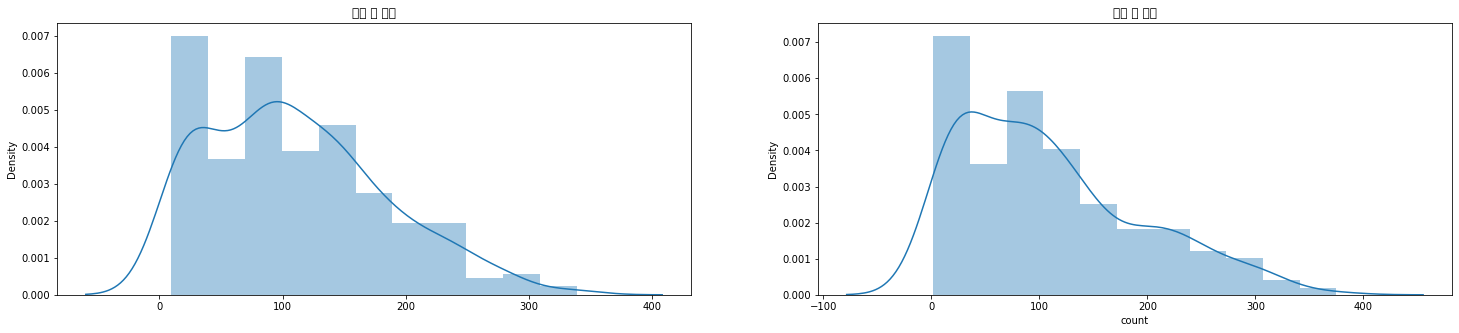

C:\Users\lsj70\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsj70\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51208 missing f

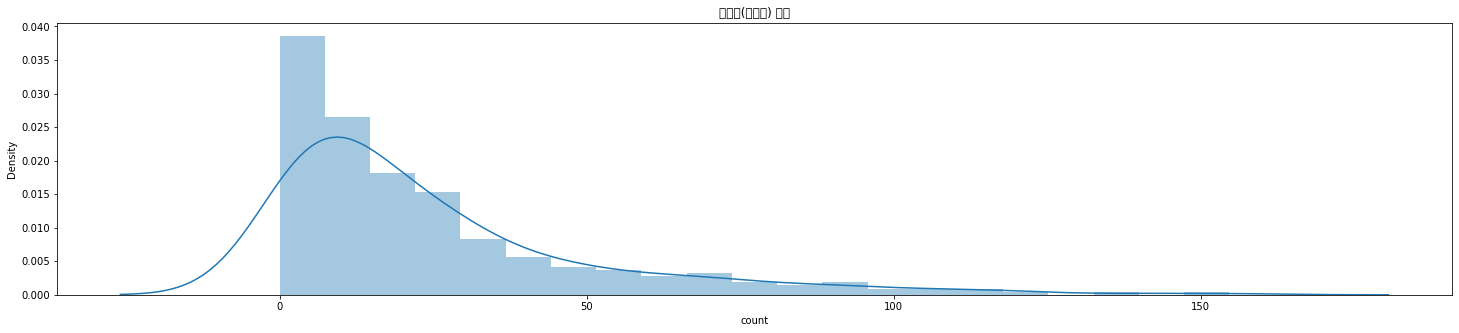

In [230]:
predictions = best_rg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("오차값(절대값) 분포")
plt.show()

## train parameter

In [146]:
X_train = train2.drop(['id', 'count'], axis = 1)
y_train = train2['count']
X_test = test1.drop('id', axis = 1)


In [147]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1)
model_400 = RandomForestRegressor(n_estimators=400, n_jobs = -1)

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
score = cross_val_score(model_100, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_200, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_300, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_400, X_train, y_train)
print(np.mean(score))


0.7803707671392164
0.7842886247136641
0.7851154971795724
0.7861915711690333


In [150]:
model_sam_2 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2)
model_sam_5 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=5)
model_sam_10 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=10)

In [151]:
score = cross_val_score(model_sam_2, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_5, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_10, X_train, y_train)
print(np.mean(score))

0.7865517866808703
0.7837027305993443
0.7819659350153823


In [152]:
model_dep_10 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=10)
model_dep_11 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=11)
model_dep_12 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=12)
model_dep_13 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=13)
model_dep_14 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=14)
model_dep_15 = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=15)

In [153]:
score = cross_val_score(model_dep_10, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_11, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_12, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_13, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_14, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_15, X_train, y_train)
print(np.mean(score))

0.7830458355893853
0.7849991123758361
0.7833157034894884
0.7851166428063111
0.7873709481189299
0.7867338532638575


## train for submission

In [239]:
X_train = train2.drop(['id', 'count'], axis = 1)
y_train = train2['count']
X_test = test1.drop('id', axis = 1)


In [260]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=400, n_jobs = -1,  min_samples_split=2, max_depth=13)

In [ ]:
'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 100
'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 200

In [261]:
X_train.shape, y_train.shape, X_test.shape

((1457, 9), (1457,), (715, 9))

In [242]:
feature_importance = pd.Series(index=features, data=model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="feature_importance", rot=0)
plt.xticks(rotation=45)
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [262]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, n_estimators=200, n_jobs=-1)

In [263]:
submission["count"]=model.predict(X_test)

In [264]:
submission.to_csv('1003data.csv', index = False)

In [ ]:
len(X_train.columns)

In [ ]:
plt.plot('hour', 'count', '*', data = train2)

In [ ]:
plt.plot('hour_bef_temperature', 'count', '*', data = train2)

In [ ]:
plt.plot('hour', 'hour_bef_temperature', '*', data = train2)